# A simple example of SVD for recommendation

**Note: Before running this, have a read through. Some of the discussion is based on my particular randomly generated data**

In [12]:
import pandas as pd
import numpy as np

First, let's generate a really simple data set. Each row is a user, and each column is an item. If the value for a user:item location is 1; that user has "liked" that item on _SocialMediaster-SellingMaster<sup>TM</sup>_, my new social media platform for people who like items and things and stuff.

In [13]:
num_users = 10
num_items = 5
np.random.seed(42)
def generate_users(num_users, num_items):
    data = []
    for i in range(num_users):
        user = [np.random.randint(2) for _ in range(num_items)]
        data.append(user)
    return data
cols = ["item"+str(i) for i in range(num_items)]
rows = ["user"+str(i) for i in range(num_users)]
user_item_mat = pd.DataFrame(generate_users(num_users,num_items), columns=cols)
user_item_mat.index = rows
user_item_mat         

,item0,item1,item2,item3,item4
user0,0,1,0,0,0
user1,1,0,0,0,1
user2,0,0,0,0,1
user3,0,1,1,1,0
user4,1,0,1,1,1
user5,1,1,1,1,1
user6,0,0,1,1,1
user7,0,1,0,0,0
user8,0,0,1,1,1
user9,1,1,0,1,1


Now, let's do some SVD. This is a small enough dataset that I really don't need to truncate... but in most large scale recommenders you WILL need to truncate, so we're going to start with only 3 components of SVD. 

In [14]:
from scipy.linalg import svd

U, Sigma, VT = svd(user_item_mat)

As a reminder, here's what we're expecting to see:

<img src="http://zwmiller.com/projects/images/svd_breakdown.png">

Great, so now what do we have? In this case **VT** is now a matrix where each column represents one of the items in the new vector space. Each row is one component of the vector space, for the items.

In [ ]:
VT = VT[:3,:]
pd.DataFrame(VT)

If I transpose this, the rows are items, and the columns are the items in the "hidden" vector space created by the truncated SVD.

In [ ]:
pd.DataFrame(VT.T)

**U** is a matrix where each row is a user and each column shows the location in the hidden vector space created by the SVD.

In [ ]:
U = U[:,:3]
pd.DataFrame(U)

**Sigma** is just the singular values of the decomposition. In this case, we're not particularly interested in **Sigma**.

In [ ]:
Sigma = Sigma[:3]
pd.DataFrame(np.diag(Sigma))

## Simple example with named entities to show this method works

In [3]:
import pandas as pd
data = [[5,4,5,0,0,0],[3,3,3,0,0,0],[5,5,5,0,0,0],[4,5,4,0,0,0],[0,0,0,3,3,3],[0,0,0,5,5,5],[0,0,0,4,5,4],[0,0,0,0,0,0]]
df = pd.DataFrame(data)

In [4]:
cols = ['Star Wars', 'Star Trek', 'Space Balls', 'Diehard','Lethal Weapon', 'Terminator']
rows = ["user"+str(i) for i in range(8)]
df.index = rows
df.columns = cols
df

,Star Wars,Star Trek,Space Balls,Diehard,Lethal Weapon,Terminator
user0,5,4,5,0,0,0
user1,3,3,3,0,0,0
user2,5,5,5,0,0,0
user3,4,5,4,0,0,0
user4,0,0,0,3,3,3
user5,0,0,0,5,5,5
user6,0,0,0,4,5,4
user7,0,0,0,0,0,0


In [5]:
from scipy.linalg import svd

U_test, Sigma_test, VT_test = svd(df)
VT_test = VT_test[:2,:]
U_test = U_test[:,:2]

In [ ]:
movie_concept_test = pd.DataFrame(VT_test, columns=cols)

In [ ]:
user_concept_test = pd.DataFrame(U_test, index=rows)

In [ ]:
user_concept_test

## Now back to our normal data

Now, let's take a look at the matrix again. 

Let's note a few things (assuming you are still looking at my data and haven't re-run anything yet):
 * Items 0 and 4 have a lot of overlapping users. Users that like Item 2, tend to also like Item 3.
 * Users 6 and 8 like exactly the same items.

In [16]:
user_item_mat

,item0,item1,item2,item3,item4
user0,0,1,0,0,0
user1,1,0,0,0,1
user2,0,0,0,0,1
user3,0,1,1,1,0
user4,1,0,1,1,1
user5,1,1,1,1,1
user6,0,0,1,1,1
user7,0,1,0,0,0
user8,0,0,1,1,1
user9,1,1,0,1,1


C:\Users\user\AppData\Local\Temp/ipykernel_3912/1736695539.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


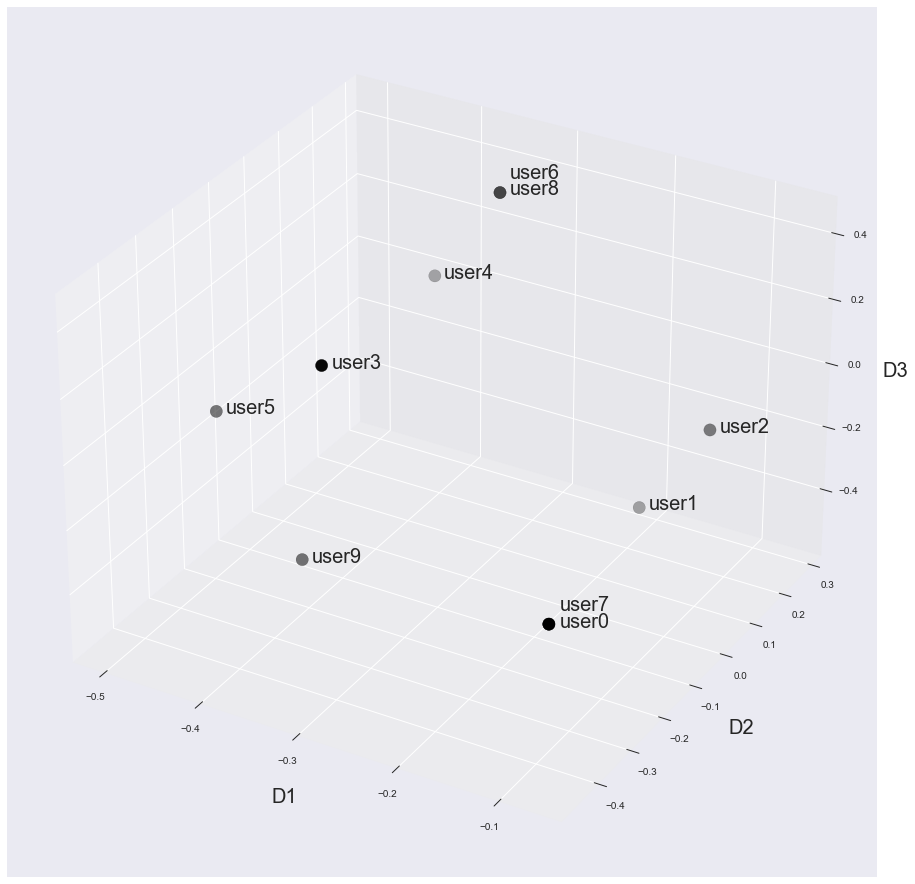

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('seaborn')

fig = plt.figure(figsize=(20,16))
ax = fig.gca(projection='3d')
ax.scatter(U[:,0],U[:,1],U[:,2],c='k',s=150);
ax.set_xlabel("D1", fontsize=20, labelpad=20)
ax.set_ylabel("D2", fontsize=20, labelpad=20)
ax.set_zlabel("D3", fontsize=20, labelpad=20);

lbls = user_item_mat.index
offset = 0.01
for i, txt in enumerate(lbls):
    if i not in [6,7]:
        ax.text(U[i,0]+offset,U[i,1],U[i,2],txt, fontsize=20)
    else:
        ax.text(U[i,0]+offset,U[i,1],U[i,2]+5*offset,txt, fontsize=20)


C:\Users\user\AppData\Local\Temp/ipykernel_3912/3486494843.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


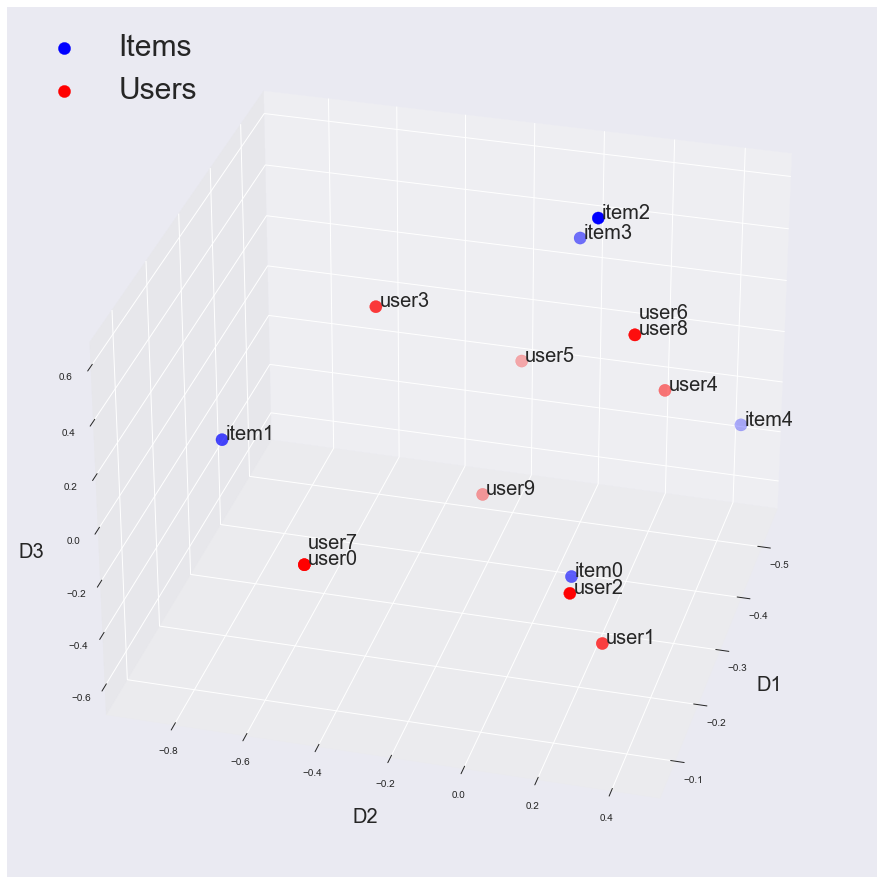

In [22]:
fig = plt.figure(figsize=(20,16))
ax = fig.gca(projection='3d')
ax.scatter(VT.T[:,0],VT.T[:,1],VT.T[:,2],c='b',s=150, label="Items");
ax.scatter(U[:,0],U[:,1],U[:,2],c='r',s=150, label="Users");
ax.set_xlabel("D1", fontsize=20, labelpad=20)
ax.set_ylabel("D2", fontsize=20, labelpad=20)
ax.set_zlabel("D3", fontsize=20, labelpad=20);

lbls = user_item_mat.columns
item_offset = 0.01
for i, txt in enumerate(lbls):
    if i not in [6,7]:
        ax.text(VT.T[i,0],VT.T[i,1]+item_offset,VT.T[i,2],txt, fontsize=20)
    else:
        ax.text(VT.T[i,0],VT.T[i,1]+item_offset,VT.T[i,2]+5*item_offset,txt, fontsize=20)

lbls = user_item_mat.index
offset = 0.01
for i, txt in enumerate(lbls):
    if i not in [6,7]:
        ax.text(U[i,0],U[i,1]+offset,U[i,2],txt, fontsize=20)
    else:
        ax.text(U[i,0],U[i,1]+offset,U[i,2]+6*offset,txt, fontsize=20)
ax.view_init(30,15)
plt.legend(loc="upper left", fontsize=30);

So, if we look in our new hidden vector space and take the dot products of items (cosine similarity!), we expect that items 2 & 3 are the most similar. 

In [18]:
compare_item = 2
for item in range(num_items):
    if item != compare_item:
        print("Item %s & %s: "%(compare_item,item), np.dot(VT.T[compare_item],VT.T[item]))

Item 2 & 0:  -1.249000902703301e-16
Item 2 & 1:  -6.938893903907228e-17
Item 2 & 3:  3.885780586188048e-16
Item 2 & 4:  -1.457167719820518e-16


If we compare users, we expect that users 6 & 8 should be the most similar.

In [19]:
compare_user = 6
for user in range(num_users):
    #if user != compare_user:
        print("User %s & %s: "%(compare_user,user), np.dot(U[compare_user],U[user]))

User 6 & 0:  -1.3877787807814457e-16
User 6 & 1:  -2.0816681711721685e-16
User 6 & 2:  -2.7755575615628914e-17
User 6 & 3:  -1.6653345369377348e-16
User 6 & 4:  1.8041124150158794e-16
User 6 & 5:  -2.7755575615628914e-17
User 6 & 6:  1.0
User 6 & 7:  -1.3964523981613297e-16
User 6 & 8:  1.3877787807814457e-16
User 6 & 9:  2.7755575615628914e-17


Let's make a function that returns recommendations for a given item input (this user likes item 0... so she'll probably also like items X, Y, Z).

In [20]:
def get_recommends(itemID, VT, num_recom=2):
    recs = []
    for item in range(VT.T.shape[0]):
        if item != itemID:
            recs.append([item,np.dot(VT.T[itemID],VT.T[item])])
    final_rec = [i[0] for i in sorted(recs,key=lambda x: x[1],reverse=True)]
    return final_rec[:num_recom]

print(get_recommends(2,VT,num_recom=2))

[3, 1]


We could also find a user that's most similar to a user and then recommend all items they like. In my example, user 3 is most similar to user 5... but user 5 also likes item 0 (and user 3 doesn't). Thus, this function will find for user 3 - User 5 is most similar, and item 0 should be something user 3 likes too.

In [21]:
def get_recommends_user(userID, U, df):
    userrecs = []
    for user in range(U.shape[0]):
        if user!= userID:
            userrecs.append([user,np.dot(U[userID],U[user])])
    final_rec = [i[0] for i in sorted(userrecs,key=lambda x: x[1],reverse=True)]
    comp_user = final_rec[0]
    print("User #%s's most similar user is User #%s "% (userID, comp_user))
    rec_likes = df.iloc[comp_user]
    current = df.iloc[userID]
    recs = []
    for i,item in enumerate(current):
        if item != rec_likes[i] and rec_likes[i]!=0:
            recs.append(i)
    return recs

user_to_rec = 3
print("Items for User %s to check out: "% user_to_rec, get_recommends_user(user_to_rec,U,user_item_mat))

User #3's most similar user is User #0 
Items for User 3 to check out:  []


That's exactly what a recommender is doing for collaborative filtering, on a massive scale!